# Notebook para estudos do histórico do Campeonato Brasileiro no período de 2000 a 2019.
### Por: Marcus Nudelman Trugilho - Outubro 2020
### 
## Análises dos gols, maiores vencedores e, no final, um gráfico animado que mostra a evolução dos gols dos principais times ao longo do tempo.
### Obs: você precisa ter o encoder FFmpeg instalado na máquina para gerar o vídeo da animação. Ele pode ser encontrado no endereço: https://www.ffmpeg.org/download.html.

## Importando todas as bibliotecas necessárias.

In [102]:
# Importando todas as bibliotecas necessárias.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import bar_chart_race as bcr

# Definindo a localização do movie encoder FFMpeg para que o gráfico de animação possa ser gerado em vídeo.

plt.rcParams['animation.ffmpeg_path'] = '/usr/local/Cellar/ffmpeg/4.3.1_1/bin/ffmpeg'
pd.set_option('display.max_columns', None)

### Importando o dataset com dados do Brasileirão, de 1980 a 2020 (dataset encontrado no Kaggle, 
### no endereço: https://www.kaggle.com/adaoduque/campeonato-brasileiro-de-futebol)


In [122]:
df = pd.read_csv('/Users/Marcus/Google Drive/**PaPi/Educação/Cursos Livres/Data Science - Tera/Kaggle/Futebol/campeonato-brasileiro-full.csv')

In [137]:
# Gerando um backup para o caso de perder o original com as transformações. Assim não será necessário rodar todo o código novamente.
df_save = df.copy()
df = df_save.copy()

### 
### Examinando os dados para identificar possíveis análises.

In [123]:
df

Horário      Dia        Data        Clube 1      Clube 2       Vencedor  \
0      16h00   Sábado  2000-07-29     Fluminense        Bahia     Fluminense   
1      16h00   Sábado  2000-07-29          Vasco        Sport          Sport   
2      16h00   Sábado  2000-07-29        Vitória    Palmeiras        Vitória   
3      17h00  Domingo  2000-07-30    Botafogo-RJ  Atlético-MG              -   
4      18h30  Domingo  2000-07-30      Juventude     Flamengo              -   
...      ...      ...         ...            ...          ...            ...   
7934   17:00  Domingo  2019-12-08          Goiás       Grêmio          Goiás   
7935   17:00  Domingo  2019-12-08  Internacional  Atlético-MG  Internacional   
7936   17:00  Domingo  2019-12-08       Cruzeiro    Palmeiras      Palmeiras   
7937   17:00  Domingo  2019-12-08         Santos     Flamengo         Santos   
7938   17:00  Domingo  2019-12-08            CSA    São Paulo      São Paulo   

          Rodada           Arena  Clube 1 Gols  Clube 2 Gols Clube 1 Estado  \
0      1ª Rodada        Maracanã             2             0             RJ   
1      1ª Rodada    São Januário             0             2             RJ   
2      1ª Rodada        Barradão             4             1             ES   
3      1ª Rodada    Caio Martins             0             0             RJ   
4      1ª Rodada  Alfredo Jaconi             1             1             RS   
...          ...             ...           ...           ...            ...   
7934  38ª Rodada   Serra Dourada             3             2             GO   
7935  38ª Rodada       Beira Rio             2             1             RS   
7936  38ª Rodada        Mineirão             0             2             MG   
7937  38ª Rodada    Vila Belmiro             4             0             SP   
7938  38ª Rodada        Rei Pelé             1             2             AL   

     Clube 2 Estado Estado Clube Vencedor  
0                BA                    RJ  
1                PE                    PE  
2                SP                    ES  
3                MG                Empate  
4                RJ                Empate  
...             ...                   ...  
7934             RS                    GO  
7935             MG                    RS  
7936             SP                    SP  
7937             RJ                    SP  
7938             SP                    SP  

[7939 rows x 13 columns]

### 
### Ajustando a nomenclatura dos times para evitar duplicidades de colunas e definindo o formato da Data para Datetime.

In [124]:
df['Clube 1'] = df['Clube 1'].str.capitalize()
df['Clube 2'] = df['Clube 2'].str.capitalize()
df['Horário'].fillna(method='ffill', inplace=True)
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

### 
### Entendendo os formatos dos dados para ver se precisaremos de conversões.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Horário                7939 non-null   object        
 1   Dia                    7939 non-null   object        
 2   Data                   7939 non-null   datetime64[ns]
 3   Clube 1                7939 non-null   object        
 4   Clube 2                7939 non-null   object        
 5   Vencedor               7939 non-null   object        
 6   Rodada                 7939 non-null   object        
 7   Arena                  7939 non-null   object        
 8   Clube 1 Gols           7939 non-null   int64         
 9   Clube 2 Gols           7939 non-null   int64         
 10  Clube 1 Estado         7939 non-null   object        
 11  Clube 2 Estado         7939 non-null   object        
 12  Estado Clube Vencedor  7939 non-null   object        
dtypes: 

In [126]:
df.isnull().sum()

Horário                  0
Dia                      0
Data                     0
Clube 1                  0
Clube 2                  0
Vencedor                 0
Rodada                   0
Arena                    0
Clube 1 Gols             0
Clube 2 Gols             0
Clube 1 Estado           0
Clube 2 Estado           0
Estado Clube Vencedor    0
dtype: int64

### 
### A coluna das Rodadas está como string. Seria bom termos os números também separados. Vamos criar uma nova coluna Rodada# para incluir isso. No processo, precisaremos processar algumas informações para que todas as linhas tenham os números das rodadas. Para os períodos em que havia o mata-mata, vamos considerar as rodadas de quartas de final, semifinal e final como rodadas adicionais.

In [127]:
df['Rodada#'] = df['Rodada'].str.extract('(\d+)')

data1 = pd.to_datetime('2001-12-04', format='%Y-%m-%d')
data2 = pd.to_datetime('2001-12-23', format='%Y-%m-%d')
data3 = pd.to_datetime('2002-11-23', format='%Y-%m-%d')
data4 = pd.to_datetime('2002-12-15', format='%Y-%m-%d')
R = 0

def rvalue(value):
    if value['Rodada'] == 'SEGUNDA FASE':
        R = 35
        return R
    elif value['Rodada'] == 'QUARTAS DE FINAL':
        R = 36
        return R
    elif value['Rodada'] == 'SEMI FINAL':
        R = 37
        return R
    elif value['Rodada'] == 'FINAL':
        R = 38
        return R
    elif (value['Rodada'] == 'Quartas de Final') & (value['Data'] > data1 <= data2):
        R = 28
        return R
    elif (value['Rodada'] == 'Semi Final') & (value['Data'] > data1 <= data2):
        R = 29
        return R
    elif (value['Rodada'] == 'Final') & (value['Data'] > data1 <= data2):
        R = 30
        return R
    elif (value['Rodada'] == 'Quartas de Final') & (value['Data'] > data3 <= data4):
        R = 30
        return R
    elif (value['Rodada'] == 'Semi Final') & (value['Data'] > data3 <= data4):
        R = 31
        return R
    elif (value['Rodada'] == 'Final') & (value['Data'] > data3 <= data4):
        R = 32
        return R
    else:
        return value['Rodada#']
    
df['Rodada#'] = df.apply(rvalue, axis=1)
df['Rodada#'] = df['Rodada#'].astype('float64')

### 
### As arenas estão também como string. Vamos criar uma coluna com números para identificar cada uma. Com isso poderemos ver se há alguma correlacão entre a arena do jogo e seu resultado.

In [129]:
df['arena_id'] = pd.Categorical(df.Arena).codes

### 
### Vamos descobrir em quantas vezes o mandante do jogo venceu. Para isso, vamos criar uma coluna categórica que indique se o mandante venceu. Entendendo como Mandante o Clube da coluna Clube 1.

In [130]:
def mandante(value):
    if value['Vencedor'] == value['Clube 1']:
        result = 1
    else:
        result = 0
    return result
df['Mandante Vence'] = df.apply(mandante, axis=1)

### 
### Muitas das variáveis são textuais. Vamos criar colunas com suas correspondentes categóricas para podermos incluílas nas análises de correlação.

In [132]:
df['Horário_cat']=df['Horário'].astype('category').cat.codes
df['Dia_cat']=df['Dia'].astype('category').cat.codes
df['Clube_1_cat']=df['Clube 1'].astype('category').cat.codes
df['Clube_2_cat']=df['Clube 2'].astype('category').cat.codes
df['Vencedor_cat']=df['Vencedor'].astype('category').cat.codes
df['Clube_1_Estado_cat']=df['Clube 1 Estado'].astype('category').cat.codes
df['Clube_2_Estado_cat']=df['Clube 2 Estado'].astype('category').cat.codes
df['Estado_Clube_Vencedor_cat']=df['Estado Clube Vencedor'].astype('category').cat.codes

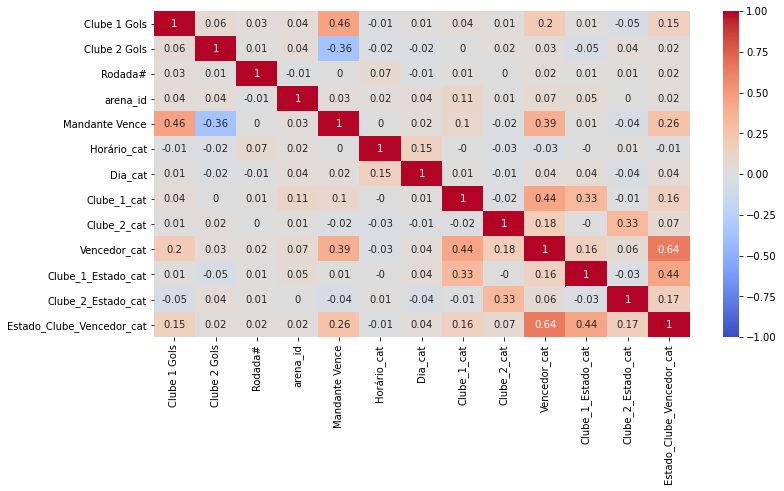

In [133]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cmap='coolwarm', ax=ax)

### 
### Para podermos analisar os gols de cada time em detalhe, vamos separar colunas para cada um com os gols marcados. Para podermos fazer o gráfico animado e já termos o total de gols de cada time, vamos somar as linhas cumulativamente em cada coluna.

In [139]:
clubes = df['Clube 1'].unique()


for i in clubes:
    def gols(row):
        if row['Clube 1'] == i:
            val = row['Clube 1 Gols']
        elif row['Clube 2'] == i:
            val = row['Clube 2 Gols']
        else:
            val = 0
        return val
    df[i] = df.apply(gols, axis=1)
    df[i] = df[i].cumsum()

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 71 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Horário                    7939 non-null   object        
 1   Dia                        7939 non-null   object        
 2   Data                       7939 non-null   datetime64[ns]
 3   Clube 1                    7939 non-null   object        
 4   Clube 2                    7939 non-null   object        
 5   Vencedor                   7939 non-null   object        
 6   Rodada                     7939 non-null   object        
 7   Arena                      7939 non-null   object        
 8   Clube 1 Gols               7939 non-null   int64         
 9   Clube 2 Gols               7939 non-null   int64         
 10  Clube 1 Estado             7939 non-null   object        
 11  Clube 2 Estado             7939 non-null   object        
 12  Estado

### Preparando um dataframe para analisar a evolução de gols marcados por ano para os 9 principais times (que mais marcaram gols em todo o período).

In [147]:
# Selecionar as colunas dos times e a Data. Limpar as linhas duplicadas de Datas (elas não será necessárias).
df_y = df.drop(df.iloc[:, 0:2], axis=1)
df_y = df_y.drop(df_y.iloc[:, 1:22], axis=1)
df_y = df_y.drop_duplicates(subset = ["Data"])
df_y.reset_index(inplace=True)

In [150]:
# Agrupar os dados por ano, contando o número total de gols naquele ano, para cada time.
df_y2 = df_y.set_index('Data')
df_y2.drop(axis=1, columns='index', inplace=True)
df_y2 = df_y2.groupby(pd.Grouper(freq="Y"))
df_y2 = df_y2.max()

In [152]:
# Ordenar pelos maiores goleadores no final do período e separar os 9 maiores.
df_y3 = df_y2.reset_index()
s = df_y3.iloc[-1]
df_y3 = df_y3.iloc[:, ((-s[1:]).argsort() + 1).reindex(df_y3.columns, fill_value=0)]
df_y3 = df_y3.set_index('Data')
df_y3 = df_y3[df_y3.columns[:9]]
df_y3.dropna(axis=0, how='any', inplace=True)

In [157]:
# Precisamos acrescentar uma coluna 'x' para poder fazer o gráfico composto.
df_y3['x'] = range(1, 1+len(df_y3))

### Agora vamos criar uma matriz de gráficos que mostra a evolução de cada time isoladamente, mas mantendo os demais ao fundo para comparação em cada um. (Obs: código retirado do endereço https://python-graph-gallery.com/125-small-multiples-for-line-chart/)

Text(0.06, 0.5, 'Note')

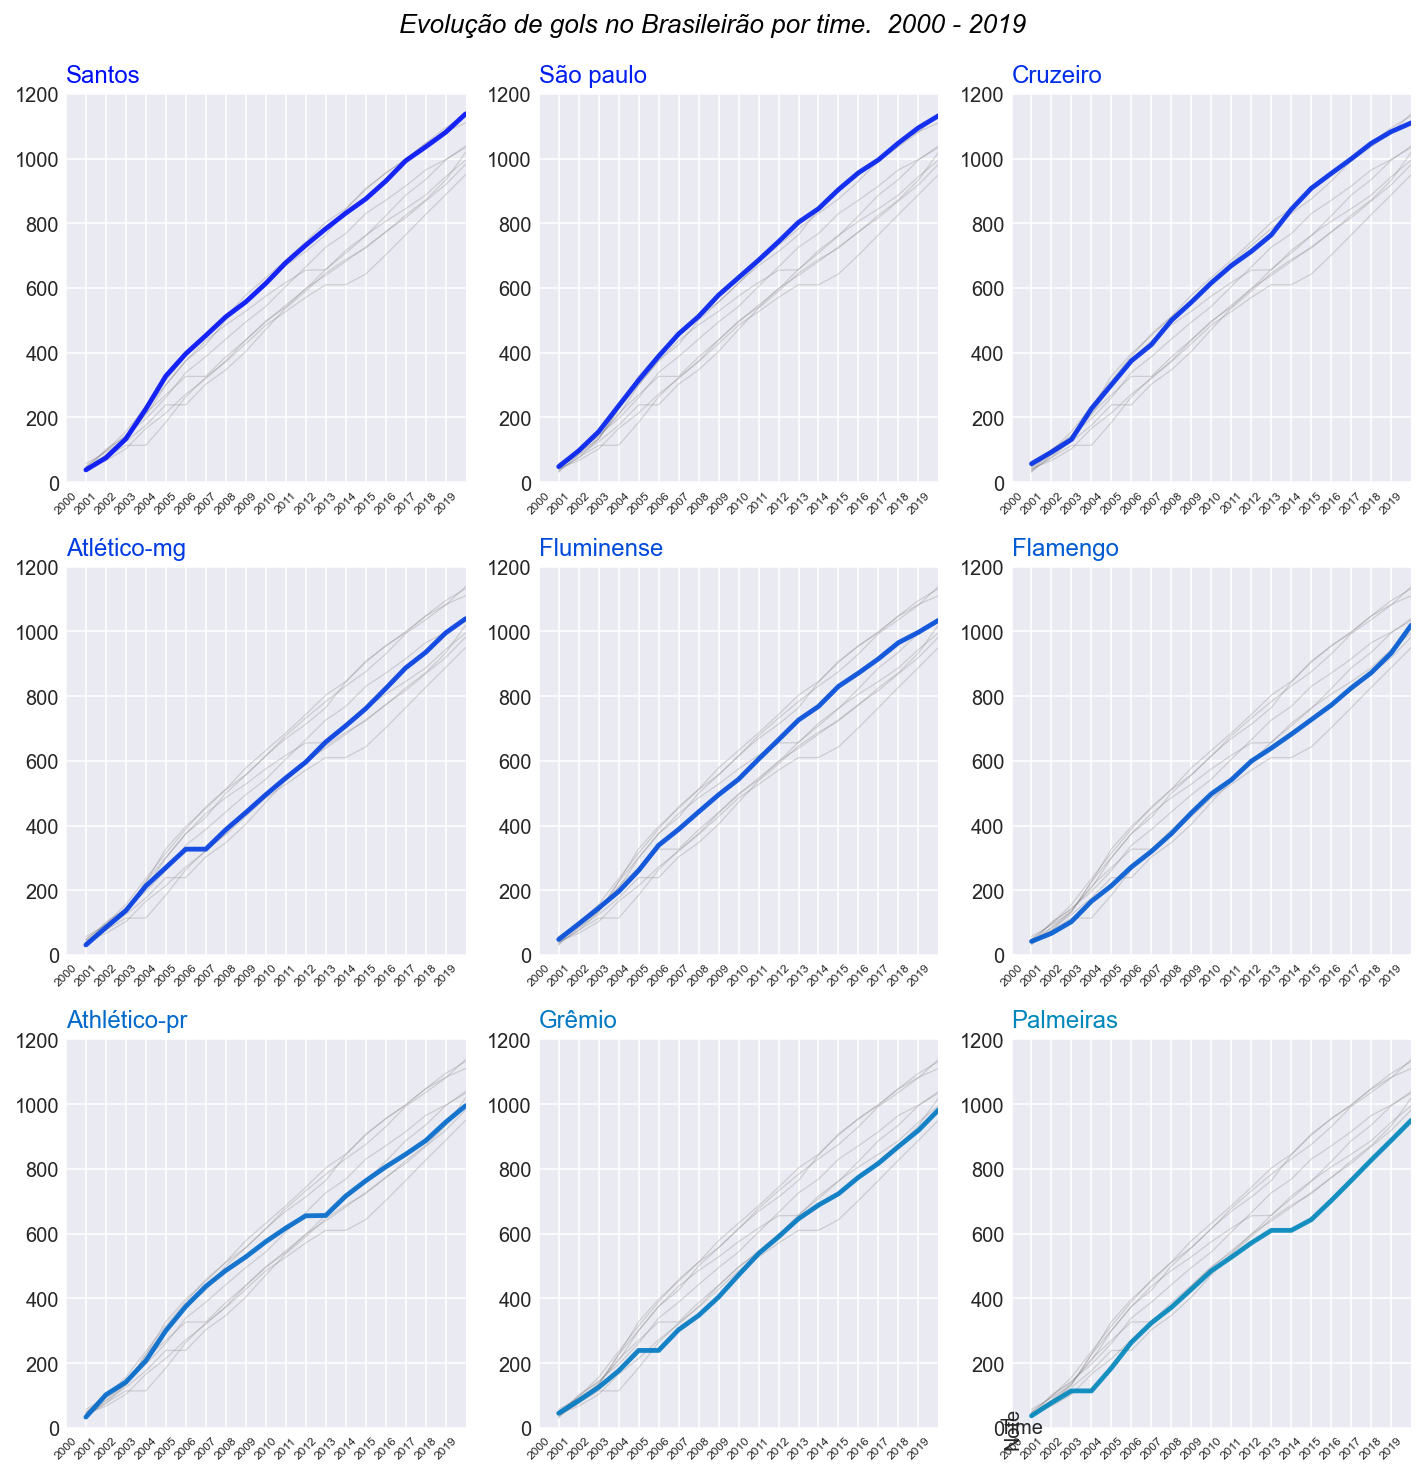

In [209]:
# Inicializar a figura
plt.style.use('seaborn-darkgrid')
 
# Criar a paleta de cores
palette = plt.get_cmap('winter', lut=18)

# Definir o formato macro da figura.
plt.figure(figsize=(10, 10), dpi=144, tight_layout=True)

# Criar os gráficos de linhas para cada time.
num=0
for column in df_y3.drop('x', axis=1):
    num+=1
 
    # Formatando a matriz de gráficos.
    plt.subplot(3,3, num)
 
    # Plotar todos os grupos em cada chart, mas de forma discreta.
    for v in df_y3.drop('x', axis=1):
        plt.plot(df_y3['x'], df_y3[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Criação do gráfico base para todos.
    plt.plot(df_y3['x'], df_y3[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Definindo os limites dos eixos dos gráficos.
    plt.xlim(0,20)
    plt.ylim(0,1200)
 
    # Labels para os anos no eixo X.
    tiks = list(range(2000, 2020))
    plt.xticks(np.arange(20), labels=tiks, fontsize=6, rotation=45.0)

    # Retirando os ticks para limpar o gráfico
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Adicionar Título
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("Evolução de gols no Brasileirão por time.  2000 - 2019", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')


### 
## Preparando o gráfico animado (bar_chart_race).
### 
### Vamos praparar um dataframe específico para o gráfico animado, apenas com as colunas dos times e seus gols e a data no index.

In [224]:
# Eliminando as colunas que não vamos usar para o gráfico, limpando as linhas com datas duplicadas e agrupando por mês.
df1 = df.drop(df.iloc[:, 0:2], axis=1)
df1 = df1.drop(df1.iloc[:, 1:22], axis=1)
df1 = df1.drop_duplicates(subset = ["Data"])
df1.reset_index(inplace=True)

df2 = df1.set_index('Data')
df2.drop(axis=1, columns='index', inplace=True)
df2 = df2.groupby(pd.Grouper(freq="M"))
df2 = df2.max()


In [225]:
# Ordenando as colunas do DataFrame pelo maior número de gols na data final e reduzindo os times para os 40 maiores 
# e limpando os meses com valores vazios.
# Os meses seguirão a sequencia mostrando apenas os meses em que houve jogos do Brasileirão (isso melhora a fluidez do gráfico).
df3 = df2.reset_index()
s = df3.iloc[-1]
df3 = df3.iloc[:, ((-s[1:]).argsort() + 1).reindex(df3.columns, fill_value=0)]
df3 = df3.set_index('Data')
df3 = df3[df3.columns[:40]]
df3.dropna(axis=0, how='any', inplace=True)

### 
### Agora, usando o módulo bar_chart_race, criado por Ted Petrou, que fez um passo-a-passo sensacional para explicar como funciona o bar_chart_race, vamos criar a animação. Os detalhes do módulo podem ser encontrados no endereço abaixo:
https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096¶

In [228]:
import warnings
warnings.filterwarnings("ignore")
dff = df3
bcr.bar_chart_race(
    df=dff,
    filename=None,
    orientation='h',
    sort='desc',
    n_bars=15,
    fixed_order=False,
    fixed_max=False,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total de gols: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Helvetica'},
    perpendicular_bar_func=None,
    period_length=500,
    figsize=(5, 5),
    dpi=144,
    cmap='tab20',
    title='Evolução de Nº de gols no Brasileirão de 2000 a 2019',
    title_size=12,
    bar_label_size=7,
    tick_label_size=9,
    shared_fontdict={'family' : 'Helvetica Neue', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)